# Libraries


In [18]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data

In [19]:
def read_csv(file_path):
    df = pd.read_csv(file_path)
    print(df.head())
    return df


# Data Classification

In [20]:
def classify_columns(data_frame):
    categorical_columns = data_frame.select_dtypes(include=['object']).columns
    numeric_columns = data_frame.select_dtypes(include=['int64', 'float64']).columns
    
    return list(categorical_columns), list(numeric_columns)

# Remove Dublicates check null 

In [21]:
def removeDublicates(df):
    df.drop_duplicates(inplace=True)
    missing_values = df.isnull().sum()
    print("Missing Values:\n", missing_values)

# Data Describe

In [22]:
def summary(df):
    summary_stats = df.describe()
    print("Summary Statistics:\n", summary_stats)
    

# Basic Preprocessing 

In [23]:
def preprocess_categorical_data(data_frame, column_name):
    # Impute missing values
    if column_name == 'Sex':
        mapping = {'male': 0, 'female': 1}  # Define mapping for Sex column
    elif column_name == 'Embarked':
        mapping = {'S': 0, 'C': 1, 'Q': 2}  # Define mapping for Embarked column
    else:
        imputer = SimpleImputer(strategy='most_frequent')
        transformed_values = imputer.fit_transform(data_frame[[column_name]])
        data_frame.iloc[:, data_frame.columns.get_loc(column_name)] = transformed_values.ravel()  # Assign transformed values using iloc
    # Map categorical values to numerical values


    data_frame[column_name] = data_frame[column_name].map(mapping)

    return data_frame


def preprocess_numeric_data(data_frame, column_name):
    # Impute missing values
    imputer = SimpleImputer(strategy='median')
    data_frame[column_name] = imputer.fit_transform(data_frame[[column_name]])

    # Scale numeric values
    scaler = StandardScaler()
    data_frame[column_name] = scaler.fit_transform(data_frame[[column_name]])

    return data_frame

# Remove Outliers

In [24]:
def remove_numeric_outliers(df, multiplier=1):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns:
        if column != 'Survived': 
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - multiplier * iqr
            upper_bound = q3 + multiplier * iqr
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# Feature Selection 

In [25]:
def feature_selection(dataset, target_variable, k=5):
    if target_variable not in dataset.columns:
        raise ValueError(f"Target variable '{target_variable}' not found in the dataset columns.")
    
    # Specify the desired column names
    selected_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    
    # Check if the target variable is not already included in the selected columns
    if target_variable not in selected_columns:
        selected_columns = [target_variable] + selected_columns

    try:
        # Select only the specified columns
        selected_dataset = dataset[selected_columns]
    except KeyError as e:
        # If any of the specified columns are not found in the dataset, raise an error
        raise KeyError(f"One or more specified columns not found in the dataset: {e}")

    return selected_dataset, dataset[target_variable]


# # Paterns & Trends Relationship

In [26]:

def explore_relationships(df, target_variable):
    # Scatter plot of Age vs. Fare
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Age', y='Fare', hue=target_variable)
    plt.title('Scatter Plot of Age vs. Fare')
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.legend(title=target_variable, loc='upper right')
    plt.show()

    # Correlation matrix
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

    # Pair plot
    sns.pairplot(df, hue=target_variable, diag_kind='kde')
    plt.title('Pair Plot of Variables')
    plt.show()

    # Box plot of Fare grouped by target variable
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=target_variable, y='Fare')
    plt.title('Box Plot of Fare by ' + target_variable)
    plt.xlabel(target_variable)
    plt.ylabel('Fare')
    plt.show()

    # Count plot of target variable by Pclass
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Pclass', hue=target_variable)
    plt.title('Count Plot of ' + target_variable + ' by Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Count')
    plt.show()

# Paterns & Trends 

# Plots

In [27]:
def plot_box_plots(data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data)
    plt.title("Box Plot For Checking   Outliers")
    plt.xticks(rotation=45)
    plt.show()

def plot_histograms(X):
    X.hist()
    plt.suptitle('Histograms of Features')
    plt.show()

# Main 

Step 1: Reading the dataset...
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3734

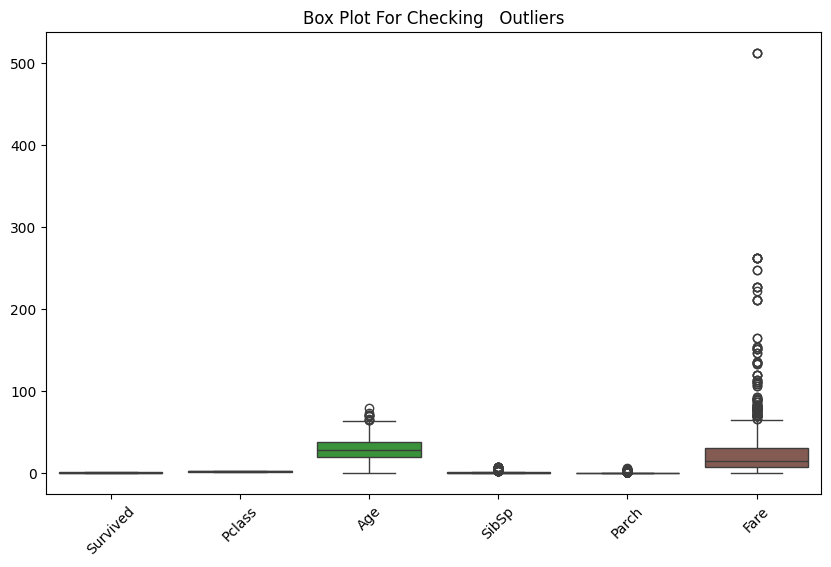

remoevd outliers 


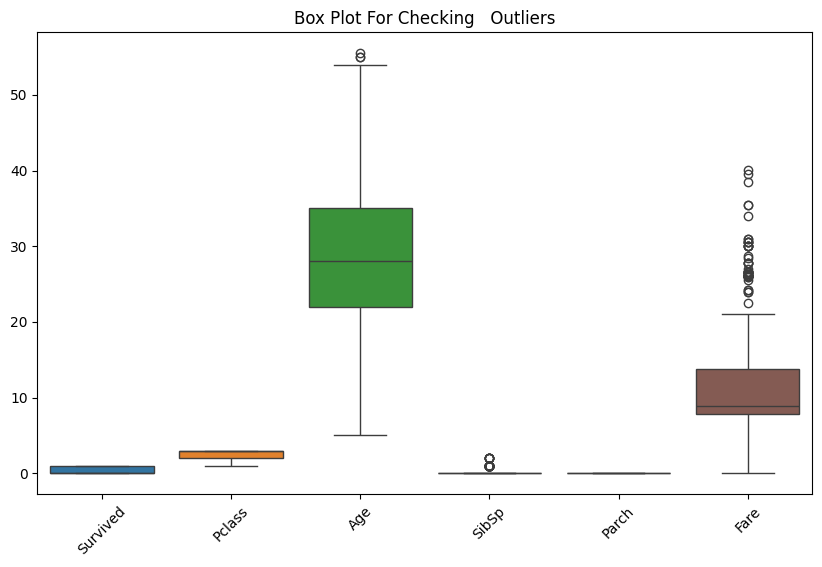


Step 4: Preprocessing the data...

Preprocessed data:
 Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

Step 5: Exploring relationships...


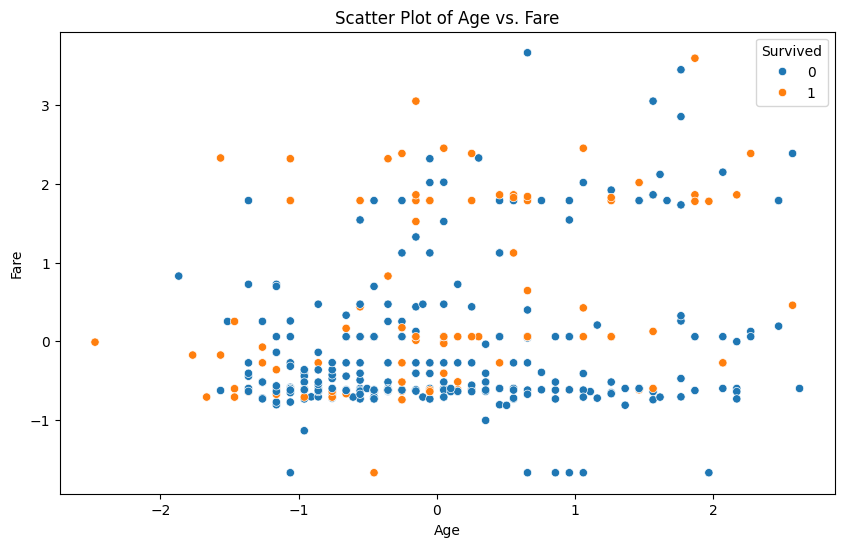

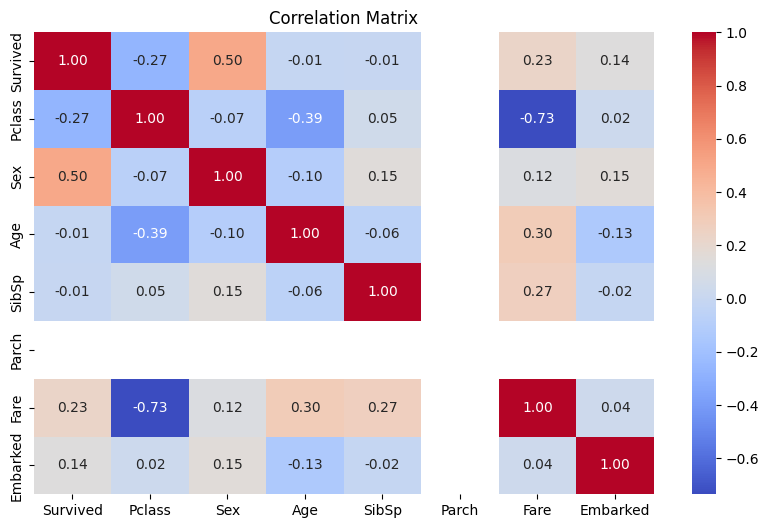

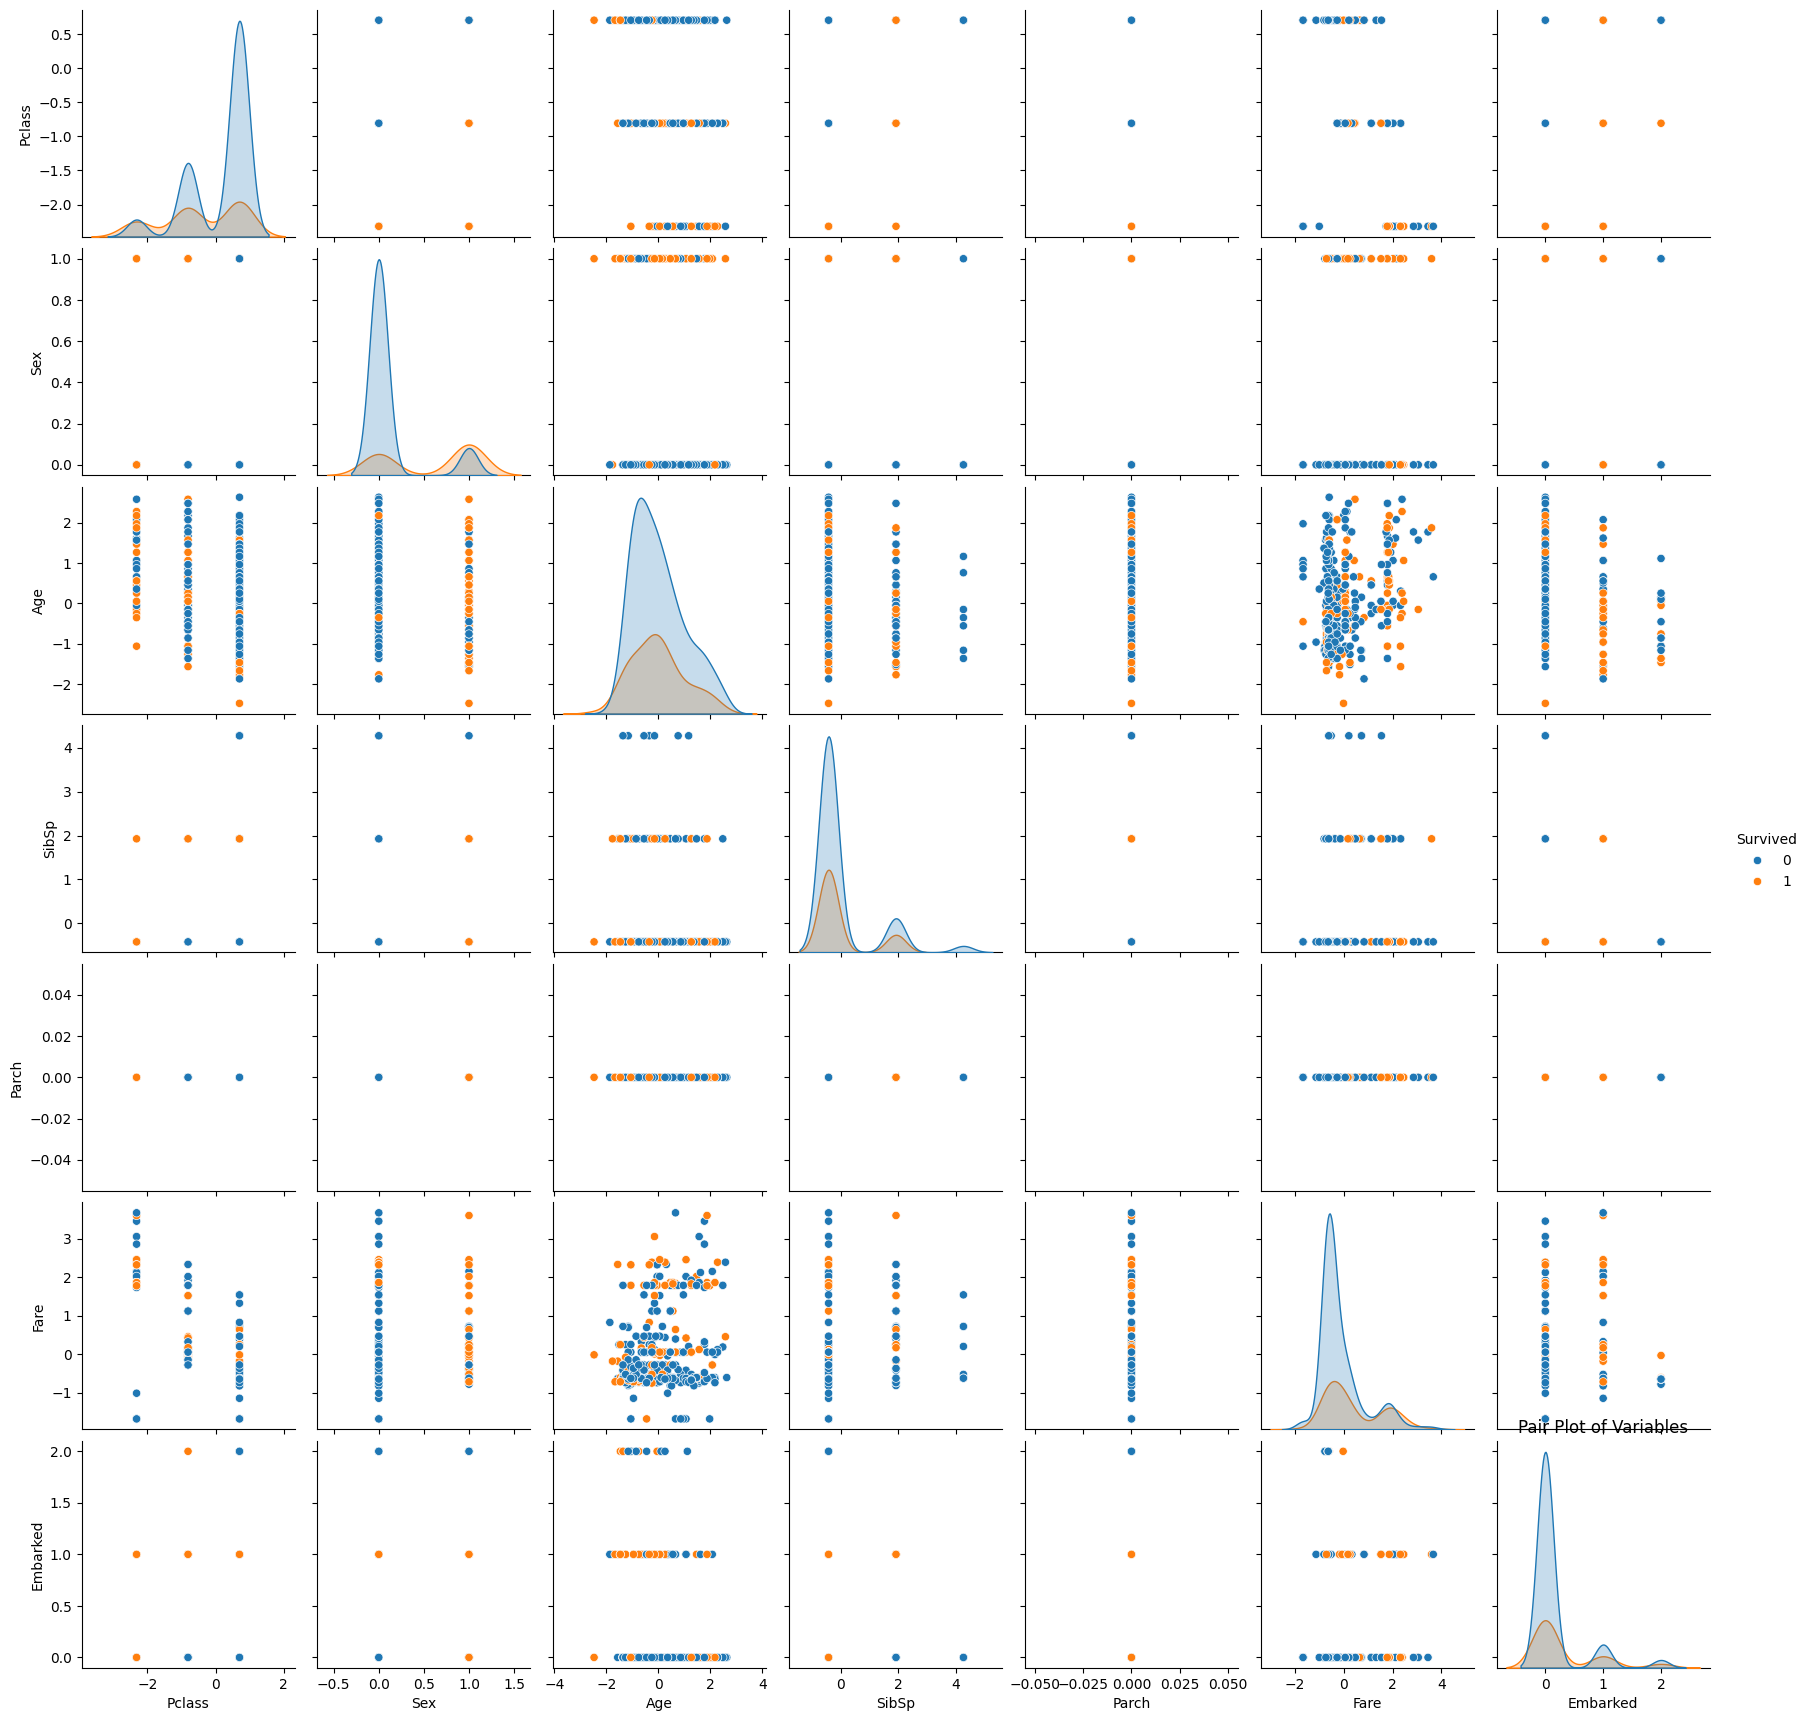

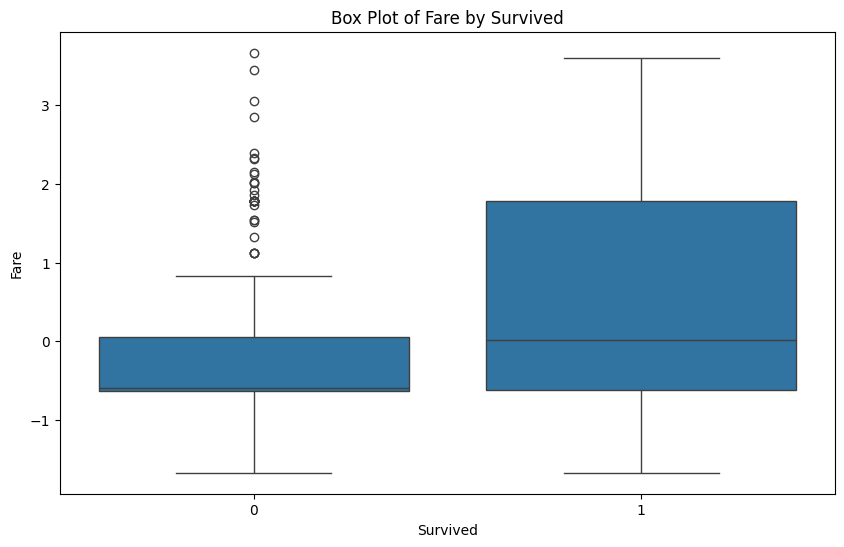

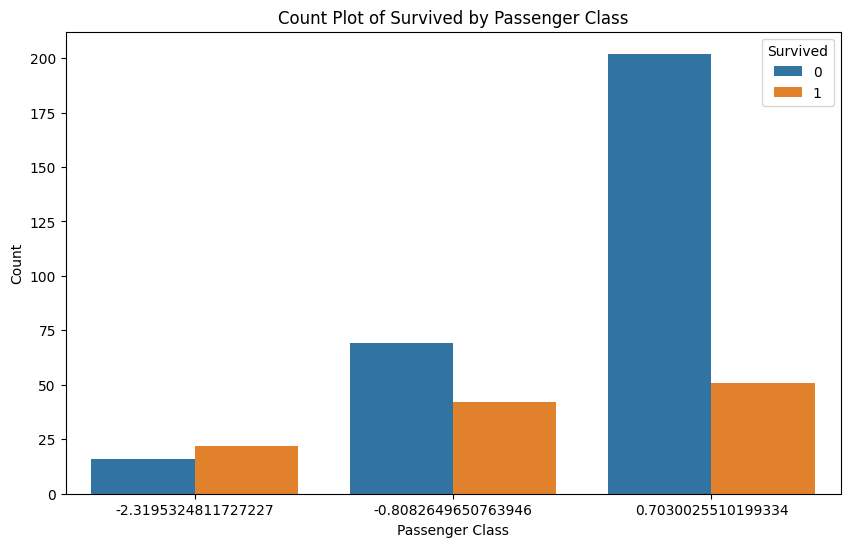

In [28]:
def main():
    file_path = 'Titanic-Dataset.csv'
    
    # Step 1: Read the dataset
    print("Step 1: Reading the dataset...")
    dataset = read_csv(file_path)
    print("\nData Set:\n", dataset.head())
    
    # Step 2: Feature selection
    print("\nStep 2: Feature Selection...")
    dataset, target_variable = feature_selection(dataset, 'Survived', k=5)
    categorical_columns, numeric_columns = classify_columns(dataset)
    print("\nCategorical Columns:", categorical_columns)
    print("Numeric Columns:", numeric_columns)
    
    # Step 3: Plot to check for outliers
    print("\nStep 3: Plotting to check for outliers...")
    plot_box_plots(dataset)
    print('remoevd outliers ')
    dataset=remove_numeric_outliers(dataset)
    plot_box_plots(dataset)
    
    # Step 4: Preprocess the data
    print("\nStep 4: Preprocessing the data...")
    for column in categorical_columns + numeric_columns:
        if column in categorical_columns and column != 'Survived': 
            dataset = preprocess_categorical_data(dataset, column)
        elif column != 'Survived':  
            dataset = preprocess_numeric_data(dataset, column)
    print("\nPreprocessed data:\n", dataset.columns)
    
    # Step 5: Explore relationships
    print("\nStep 5: Exploring relationships...")
    explore_relationships(dataset, 'Survived')
    


if __name__ == "__main__":
    main()
